# FRAUDE TARJETAS DE CRÉDITO.

Motivación: 
- El numero de transacciones fraudulentas sobre el total es de un 0.6 %
- El monto de transacciones fraudulentas sobre el total de transacciones es de un 4.4 %

Según un estudio reciente de la Confederación Española de Organizaciones Empresariales (CEOE), las empresas en España obtienen en promedio un beneficio neto del 5,7% sobre sus ventas. Este porcentaje varía según el sector, siendo el sector servicios el que tiene un mayor margen de beneficio con un 7,3%


Objetivo: Usando varios tipos de modelos de machine learning, indentificar las mejores variables para predecir el fraude en tarjetas de crédito.
    
- Métrica de evaluación: Recall (TP/ (TP+FN))

Notas técnicas:
- IMPORTANTE: Técnicas de rebalanceo y oversampling para que aprenda de los 1s, que al final es lo que me interesa. El resamplng solo se hace en train, hay que dejar la parte de test sin tocar(!)
- Va a ser necesario mucho feature engineering- media y mediana de transacción por cliente y comercio, número de transacciones por mes por cliente, por semana, variación del número de transacciones, etc.

Variables:
*    trans_date_trans_time -> Transaction time stamp

*    cc_num -> Credit card number

*    merchant -> merchant name

*    category -> transaction category

*    amt -> Transaction amount

*    first -> First name of card holder

*    last -> Last name of card holder

*    gender -> Sex of card holder

*    street -> transaction address

*    city -> transaction city

*    state -> transaction state

*    zip -> transaction zipcode

*    lat -> transaction lattitude

*    long -> transaction longitude

*    city_pop -> Population of the city

*    job -> job of the card holder

*    dob -> date of birth of card holder

*    trans_num -> transaction number of transaction

*    unix_time -> time in unix format

*    merch_lat -> lattitude of the merchant

*    merch_long -> longitude of merchant

*    is_fraud -> nature of transaction (fraud or not fraud)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r"C:\Users\rafam\OneDrive\Documentos\GitHub\Proyecto Machine Learning\fraudTrain.csv")
df= pd.DataFrame(data)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
df.shape

(1296675, 23)

In [4]:
df= df.rename(columns = {'Unnamed: 0':'id'})

In [5]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.describe()

,id,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df['is_fraud'].value_counts(normalize= True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [9]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## ANÁLISIS EXPLORATIORIO

### ANÁLISIS UNIVARIANTE

### ANÁLISIS BIVARIANTE

In [12]:
df.groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud job                                                 
1        Architect                        948.818182  972.280
         Designer, jewellery              899.408571  857.620
         Gaffer                           897.211111  862.730
         Ship broker                      874.505714  949.440
         Community education officer      869.980000  925.270
...                                              ...      ...
0        Engineer, materials               49.650470   35.120
         Travel agency manager             49.288215   24.280
         Seismic interpreter               48.242206   27.410
         Therapist, sports                 47.170546   23.255
         Producer, television/film/video   46.192804   34.570

[918 rows x 2 columns]

In [13]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud job                                                      
1        Architect                             948.818182  972.280
         Designer, jewellery                   899.408571  857.620
         Gaffer                                897.211111  862.730
         Ship broker                           874.505714  949.440
         Community education officer           869.980000  925.270
...                                                   ...      ...
         Pathologist                           168.640000   67.275
         Information officer                   168.566250  186.720
         Geophysicist/field seismologist       160.656000   21.480
         English as a second language teacher  140.075000  140.075
         Theatre manager                       125.860000   18.870

[443 rows x 2 columns]

In [14]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud job                                                
0        Manufacturing systems engineer   100.943205  54.085
         Chief of Staff                    97.517109  76.325
         Air broker                        96.932320  76.540
         Secretary/administrator           96.874603  75.970
         Horticultural therapist           96.586783  76.770
...                                              ...     ...
         Engineer, materials               49.650470  35.120
         Travel agency manager             49.288215  24.280
         Seismic interpreter               48.242206  27.410
         Therapist, sports                 47.170546  23.255
         Producer, television/film/video   46.192804  34.570

[475 rows x 2 columns]

In [139]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'category'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud category                           
1        shopping_net    999.254939  995.570
         shopping_pos    876.921815  867.760
         misc_net        797.012852  792.330
         entertainment   503.535579  498.860
         grocery_pos     311.989616  309.980
         home            257.432626  252.160
         misc_pos        218.284080    8.955
         food_dining     120.076954  119.420
         personal_care    26.170545   20.825
         health_fitness   20.248421   19.800
         kids_pets        18.121674   19.520
         gas_transport    12.288204   10.645
         grocery_net      12.162836   12.365
         travel            9.064569    9.735

In [141]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=True)

mean  median
is_fraud job                                                
0        Producer, television/film/video   46.192804  34.570
         Therapist, sports                 47.170546  23.255
         Seismic interpreter               48.242206  27.410
         Travel agency manager             49.288215  24.280
         Engineer, materials               49.650470  35.120
...                                              ...     ...
         Horticultural therapist           96.586783  76.770
         Secretary/administrator           96.874603  75.970
         Air broker                        96.932320  76.540
         Chief of Staff                    97.517109  76.325
         Manufacturing systems engineer   100.943205  54.085

[475 rows x 2 columns]

In [15]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'merchant'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud merchant                                                   
1        fraud_Fisher Inc                       1039.242286  1053.08
         fraud_Altenwerth, Cartwright and Koss  1030.005000  1031.98
         fraud_Medhurst PLC                     1026.265152  1045.55
         fraud_Kuhic, Bins and Pfeffer          1022.197179  1018.71
         fraud_Gottlieb, Considine and Schultz  1022.034571  1019.96
...                                                     ...      ...
         fraud_Mosciski Group                      4.806667     4.50
         fraud_Breitenberg LLC                     4.440000     3.10
         fraud_Hagenes, Hermann and Stroman        3.633333     2.45
         fraud_Hartmann, Rowe and Hermann          2.780000     2.78
         fraud_Jerde-Hermann                       2.770000     2.77

[679 rows x 2 columns]

In [16]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'merchant'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud merchant                                                
0        fraud_Boyer-Haley                     166.450217   6.210
         fraud_Little-Gleichner                163.239655   6.090
         fraud_Monahan, Hermann and Johns      159.500222   6.240
         fraud_Champlin, Rolfson and Connelly  156.982239   6.330
         fraud_Eichmann, Hayes and Treutel     147.996357   6.430
...                                                   ...     ...
         fraud_Auer LLC                         46.522964  30.730
         fraud_Leffler-Goldner                  46.479767  32.295
         fraud_Morissette-Schaefer              46.308897  29.635
         fraud_Bradtke, Torp and Bahringer      46.031741  31.250
         fraud_Parker-Kunde                     45.936454  31.005

[693 rows x 2 columns]

In [17]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'city'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean    median
is_fraud city                                   
1        De Lancey          926.156667  1067.280
         North East         918.425556  1031.240
         Schaefferstown     897.211111   862.730
         Thida              888.572500  1019.155
         Harrodsburg        884.250000   880.000
...                                ...       ...
         Bauxite            110.463750    69.585
         Westhampton Beach   79.926250    64.690
         Hurricane           18.403333    17.950
         Phenix City         12.700000    12.700
         Denham Springs      10.220000    10.220

[702 rows x 2 columns]

In [18]:
trans_per_city= df['city'].value_counts()

In [19]:
fraudulent_trans_per_city= df[df['is_fraud'] == 1].groupby('city').size()

In [20]:
df.groupby('city').count()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
city,,,,,,,,,,,,,,,,,,,,,
Achille,532,532,532,532,532,532,532,532,532,532,...,532,532,532,532,532,532,532,532,532,532
Acworth,2097,2097,2097,2097,2097,2097,2097,2097,2097,2097,...,2097,2097,2097,2097,2097,2097,2097,2097,2097,2097
Adams,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
Afton,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,...,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
Akron,511,511,511,511,511,511,511,511,511,511,...,511,511,511,511,511,511,511,511,511,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woods Cross,514,514,514,514,514,514,514,514,514,514,...,514,514,514,514,514,514,514,514,514,514
Woodville,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,...,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109
Yellowstone National Park,525,525,525,525,525,525,525,525,525,525,...,525,525,525,525,525,525,525,525,525,525


In [21]:
perc_fraudulent_trans_per_city= fraudulent_trans_per_city/ trans_per_city

In [22]:
perc_fraudulent_trans_per_city[(perc_fraudulent_trans_per_city > 0.5)].value_counts()

1.0    58
Name: count, dtype: int64

In [23]:
perc_fraudulent_trans_per_city[(perc_fraudulent_trans_per_city > 0.5) & (trans_per_city > 10)].index.tolist()


['Beacon',
 'Byesville',
 'Clinton',
 'Coulee Dam',
 'Granbury',
 'Hubbell',
 'Kaktovik',
 'La Grande',
 'Madisonville',
 'Melville',
 'Mineral',
 'Mount Vernon',
 'Phelps',
 'Queen Anne',
 'Roland',
 'Walkertown',
 'Wartburg',
 'West Frankfort',
 'Winnsboro']

In [24]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'city'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud city                            
0        Amorita       108.151100  34.680
         Cross         101.193699  34.750
         Grimesland    100.943205  54.085
         Beaverdam      99.968718  77.925
         Rock Glen      99.554705  76.070
...                           ...     ...
         Ragland        45.838163  25.100
         Johns Island   45.428324  23.560
         Reno           45.154957  20.425
         Owensville     44.717345  17.030
         Ruidoso        42.951671  22.045

[836 rows x 2 columns]

## FEATURE ENGINEERING

In [25]:
df["complete_name"] = df["first"] + '_' + df["last"]

In [26]:
df['complete_name'].nunique()

973

In [27]:
dropped_cols= ['id', 'first', 'last']

In [28]:
df= df.drop(dropped_cols, axis= 1)

In [29]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'complete_name'],
      dtype='object')

In [30]:
df['trans_date_trans_time']= pd.to_datetime(df['trans_date_trans_time'])

In [31]:
df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_time'] = df['trans_date_trans_time'].dt.time

In [32]:
df['transaction_date'].nunique()

537

In [33]:
# datos de 1 año y medio

In [34]:
df['transaction_time']

0          00:00:18
1          00:00:44
2          00:00:51
3          00:01:16
4          00:03:06
             ...   
1296670    12:12:08
1296671    12:12:19
1296672    12:12:32
1296673    12:13:36
1296674    12:13:37
Name: transaction_time, Length: 1296675, dtype: object

In [35]:
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)
df['minute'] = df['transaction_time'].apply(lambda x: x.minute)
df['second'] = df['transaction_time'].apply(lambda x: x.second)

In [36]:
df['hour'].nunique()

24

In [37]:
df['year'] = df['transaction_date'].apply(lambda x: x.year)
df['month'] = df['transaction_date'].apply(lambda x: x.month)
df['day'] = df['transaction_date'].apply(lambda x: x.day)

In [38]:
df['month'].nunique()

12

In [39]:
df['state'].nunique()

51

In [40]:
df['city'].nunique()

894

In [41]:
df['merchant'].nunique()

693

In [42]:
df['complete_name'].nunique()

973

In [43]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'complete_name', 'transaction_date', 'transaction_time',
       'hour', 'minute', 'second', 'year', 'month', 'day'],
      dtype='object')

In [44]:
# Media y la mediana de las transacciones por cliente
mean_by_customer = df.groupby('complete_name')['amt'].mean().rename('mean_transaction_by_customer')
median_by_customer = df.groupby('complete_name')['amt'].median().rename('median_transaction_by_customer')

# Media y la mediana de las transacciones por comercio
mean_by_merchant = df.groupby('merchant')['amt'].mean().rename('mean_transaction_by_merchant')
median_by_merchant = df.groupby('merchant')['amt'].median().rename('median_transaction_by_merchant')

In [45]:
mean_by_customer.sort_values(ascending=False)

complete_name
Robin_Davis           948.818182
Rachel_Terrell        918.425556
Kelly_Lawrence        874.505714
Diana_Rodgers         858.480000
Alex_Singh            833.969000
                         ...    
Robert_Haynes          46.982659
Thomas_Sullivan        46.936671
Rebecca_Conley         46.886541
Amy_Daugherty          44.717345
Michelle_Rodriguez     42.951671
Name: mean_transaction_by_customer, Length: 973, dtype: float64

In [46]:
median_by_customer.sort_values(ascending=False)

complete_name
Rachel_Terrell      1031.240
Alex_Singh           998.255
Robin_Davis          972.280
Benjamin_Beck        953.590
Kelly_Lawrence       949.440
                      ...   
Gary_Martinez         20.740
Jasmine_Wade          20.700
Victoria_Fleming      20.260
Amy_Daugherty         17.030
Eric_Patel            16.640
Name: median_transaction_by_customer, Length: 973, dtype: float64

In [47]:
#df = df.join(mean_by_customer, on='complete_name')
#df = df.join(median_by_customer, on='complete_name')
#df = df.join(mean_by_merchant, on='merchant')
#df = df.join(median_by_merchant, on='merchant')

In [48]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [49]:
df[df['is_fraud'] == 1]['complete_name']

2449         Jason_Murphy
2472           Misty_Hart
2523           Misty_Hart
2546         Jason_Murphy
2553           Misty_Hart
                ...      
1295399    Ashley_Cabrera
1295491    Ashley_Cabrera
1295532     William_Perry
1295666      Brooke_Smith
1295733     William_Perry
Name: complete_name, Length: 7506, dtype: object

In [50]:
df[df['is_fraud'] == 1]['complete_name'].value_counts()

complete_name
Scott_Martin        27
Jennifer_Scott      26
Robert_James        22
Linda_Davis         20
Susan_Garcia        20
                    ..
Debra_Stark          2
Sabrina_Nolan        2
Jessica_Ward         2
Katherine_Tucker     2
William_Perry        2
Name: count, Length: 754, dtype: int64

In [51]:
df[df['is_fraud'] == 1]['complete_name'].unique()

array(['Jason_Murphy', 'Misty_Hart', 'Heather_Chase', 'Mark_Brown',
       'Helen_Campbell', 'Mark_Allen', 'Eric_Patel', 'Jennifer_Carrillo',
       'Rebecca_Farley', 'Jennifer_Scott', 'Amber_Perez', 'Tina_Lawrence',
       'Justin_Gay', 'Larry_House', 'Guy_Thompson', 'Andrew_Tucker',
       'Becky_Mckinney', 'Michelle_Juarez', 'Dorothy_Zuniga',
       'Kelly_Zimmerman', 'Nicholas_Mcmahon', 'Dustin_Roberts',
       'Briana_Santos', 'Patrick_Vaughan', 'Adam_Stark', 'Tina_Alvarez',
       'Sabrina_Johnson', 'Rick_Martinez', 'Michelle_Gregory',
       'Patrick_Torres', 'Brianna_Wilson', 'Maria_Garcia',
       'Jennifer_Vance', 'Dorothy_Thomas', 'Patricia_Gonzalez',
       'Joanna_Hudson', 'Ryan_Anderson', 'David_Vasquez', 'Sarah_Bell',
       'Judith_Moss', 'Bobby_Smith', 'Renee_Parrish', 'Cody_Blake',
       'Molly_Marshall', 'Lindsay_Wilson', 'Melissa_Brown',
       'Margaret_Lam', 'Ryan_Foster', 'Mark_Pennington',
       'Patricia_Rodriguez', 'Sarah_Cross', 'Stanley_Dickson',
       'J

In [52]:
# todos estas personas han cometido fraude más de una vez

In [53]:
fraud_counts = df[df['is_fraud'] == 1]['complete_name'].value_counts()

In [108]:
fraud_counts[fraud_counts > 20].index

Index(['Scott_Martin', 'Jennifer_Scott', 'Robert_James'], dtype='object', name='complete_name')

In [109]:
frequent_fraudsters = fraud_counts[fraud_counts > 20].index

# Crear una columna dummy para cada uno de los frequent fraudsters
for i in frequent_fraudsters:
    df[f'{i}_dummy'] = (df['complete_name'] == i).astype(int)

In [56]:
fraudulent_transactions = df[df['is_fraud'] == 1]

# Calcular el monto total de las transacciones fraudulentas por cada persona (cliente)
fraudulent_amount_per_customer = fraudulent_transactions.groupby('complete_name')['amt'].sum().reset_index(name='total_fraudulent_amount')
print("Monto total de transacciones fraudulentas por cliente:")
print(fraudulent_amount_per_customer.sort_values(by= 'total_fraudulent_amount', ascending= False))

Monto total de transacciones fraudulentas por cliente:
        complete_name  total_fraudulent_amount
324    Jennifer_Scott                 14319.39
656      Scott_Martin                 13656.63
541   Micheal_Walters                 12011.59
686      Susan_Garcia                 11457.11
117   Charles_Preston                 11061.27
..                ...                      ...
414  Katherine_Tucker                   341.06
596  Rebecca_Erickson                   280.15
436   Kimberly_Martin                    55.21
634     Sabrina_Nolan                    25.40
746     William_Perry                    20.44

[754 rows x 2 columns]


In [57]:
df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

In [58]:
df.groupby('is_fraud')['amt'].median()

is_fraud
0     47.280
1    396.505
Name: amt, dtype: float64

In [59]:
df[df['is_fraud'] == 1]['amt'].sum()

3988088.6100000003

In [60]:
fraudulent_transactions_amt = df[df['is_fraud'] == 1]['amt'].sum()

In [61]:
total_transactions_amt= df['amt'].sum()

In [62]:
len(df['is_fraud'])

1296675

In [63]:
total_transactions= len(df['is_fraud'])

In [64]:
len(fraudulent_transactions)

7506

In [65]:
print("El numero de transacciones fraudulentas sobre el total es de un", (len(fraudulent_transactions)/total_transactions) * 100, "%")

El numero de transacciones fraudulentas sobre el total es de un 0.5788651743883394 %


In [66]:
print("El monto de transacciones fraudulentas sobre el total de transacciones es de un", (fraudulent_transactions_amt/total_transactions_amt) *100, "%")

El monto de transacciones fraudulentas sobre el total de transacciones es de un 4.37182900969654 %


In [67]:
transactions_per_customer = df.groupby('complete_name').size().reset_index(name='num_transactions_per_customer')

In [68]:
transactions_per_merchant = df.groupby('merchant').size().reset_index(name='num_transactions_per_merchant')

In [69]:
transactions_per_customer.sort_values(by='num_transactions_per_customer', ascending= False)

,complete_name,num_transactions_per_customer
844,Scott_Martin,4618
413,Jeffrey_Smith,3592
713,Monica_Cohen,3123
86,Barbara_Taylor,3123
448,Jessica_Perez,3119
...,...,...
710,Misty_Hart,7
171,Christina_Norris,7
59,Angelica_Lopez,7
820,Samantha_Ramirez,7


In [70]:
transactions_per_merchant.sort_values(by='num_transactions_per_merchant', ascending= False)

,merchant,num_transactions_per_merchant
316,fraud_Kilback LLC,4403
105,fraud_Cormier LLC,3649
571,fraud_Schumm PLC,3634
349,fraud_Kuhn LLC,3510
70,fraud_Boyer PLC,3493
...,...,...
633,fraud_Treutel-King,775
143,"fraud_Douglas, DuBuque and McKenzie",775
423,"fraud_Medhurst, Labadie and Gottlieb",759
505,fraud_Reichert-Weissnat,753


In [71]:
df['amt_over_300'] = (df['amt'] > 800).astype(int)

### ANÁLISIS EXPLORATORIO

In [72]:
num_cols= df.select_dtypes(include=['number'])

In [73]:
#for i in num_cols:
#    sns.histplot(num_cols[i])

In [74]:
#sns.pairplot(num_cols, hue= 'is_fraud')

In [75]:
#correlation_matrix = numeric_df.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Heatmap de la correlación de las columnas numéricas')
#plt.show()

### DIVIDIR EN TRAIN Y TEST

In [94]:
X= df.drop('is_fraud', axis=1)
X= X.select_dtypes('number')
X

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,...,Kelsey_Richards_dummy,Jodi_Rodriguez_dummy,Patricia_Russell_dummy,Jose_Vasquez_dummy,Karen_Warren_dummy,Marissa_Powell_dummy,Rachel_Villarreal_dummy,John_Nichols_dummy,Paula_Estrada_dummy,amt_over_300
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,0,0,0,0,0,0,0,0,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,0,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,12,...,0,0,0,0,0,0,0,0,0,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,12,...,0,0,0,0,0,0,0,0,0,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,12,...,0,0,0,0,0,0,0,0,0,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,12,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X = df[['amt', 'Robert_James_dummy', 'Jennifer_Scott_dummy', 'Scott_Martin_dummy']]

In [79]:
y= df['is_fraud']
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [81]:
#from sklearn.preprocessing import StandardScaler

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
#scaler = StandardScaler()
#scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

### REBALANCEO DEL TARGET EN TRAIN

In [82]:
# !pip install imblearn

In [104]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

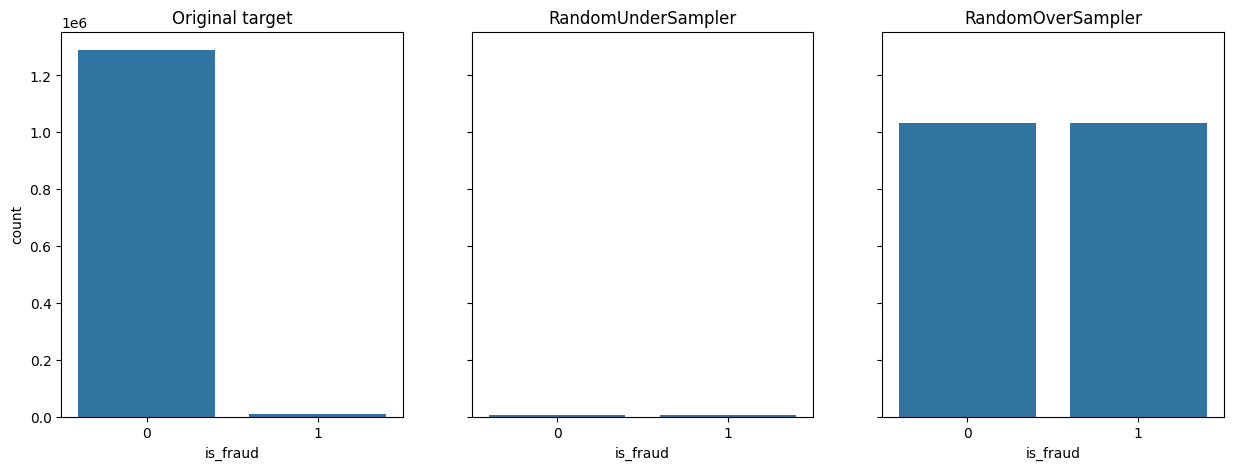

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Original target
sns.countplot(x=y, data=df, ax=axes[0])
axes[0].set_title("Original target")

# RandomUnderSampler
sns.countplot(x=y_rus, ax=axes[1])
axes[1].set_title("RandomUnderSampler")

# RandomOverSampler
sns.countplot(x=y_ros, ax=axes[2])
axes[2].set_title("RandomOverSampler");

**Algunas consideraciones antes de utilizar esta técnica**
- Nunca testear sobre el conjunto sampleado. Siempre sobre el conjunto de test original 
- Si realizamos CrossValidation, siempre samplear DURANTE el CrossValidation, no antes. Es decir, meterlo en el Pipeline.

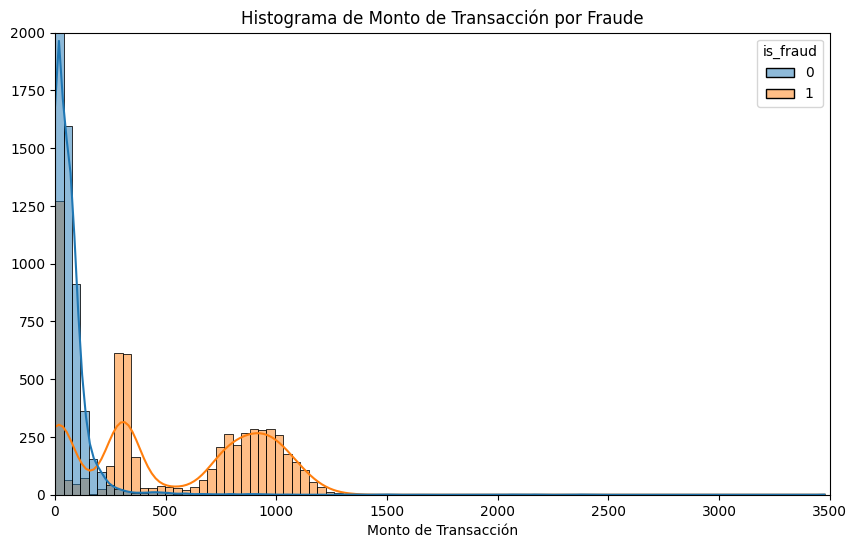

In [85]:
plt.figure(figsize=(10, 6))

sns.histplot(data=X_rus, x='amt', hue=y_train, kde=True)

plt.xlim(0, 3500)
plt.ylim(0, 2000)


plt.title('Histograma de Monto de Transacción por Fraude')
plt.xlabel('Monto de Transacción')
plt.ylabel('')

plt.show()

In [86]:
df_combined = pd.concat([X_rus, y_rus], axis=1)

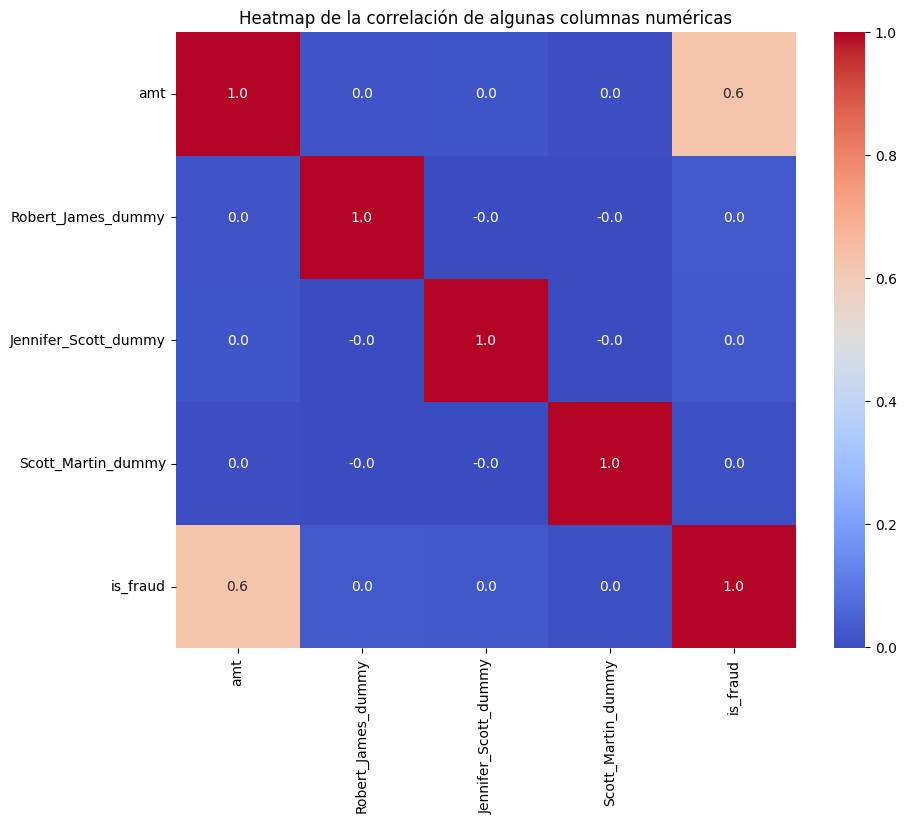

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap de la correlación de algunas columnas numéricas')
plt.show()

MODELO

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV

estimator2 = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid_rf = {
    'max_depth': [2, 3, 6, 10],
    'max_features': [2, 4, 7, 10]         
    #'min_samples_split': [2, 5, 10],     
    #'min_samples_leaf': [1, 3, 5]        
}

scoring = 'recall'

grid_search = GridSearchCV(estimator=estimator2, param_grid=param_grid_rf, cv=10, scoring=scoring)

grid_search.fit(X_rus, y_rus)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntaje de validación cruzada (recall):")
print(grid_search.best_score_)

Mejores parámetros encontrados:
{'max_depth': 3, 'max_features': 4}
Mejor puntaje de validación cruzada (recall):
0.93517177458529


In [106]:
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_depth= 3, max_features=4)
rnd_clf.fit(X_rus, y_rus)

y_pred_rfh = rnd_clf.predict(X_test)

recall_score(y_test, y_pred_rfh)

0.9335526315789474

In [126]:
best_model = grid_search.best_estimator_
best_model.fit(X_test, y_test) 

RandomForestClassifier(max_depth=3, max_features=4, random_state=42)

In [147]:
import pickle  
with open('best_model.pkl', 'wb') as file:
   pickle.dump(best_model, file)

In [148]:
with open('best_model.pkl', 'rb') as file:
        loaded_model= pickle.load(file)

In [ ]:
nuevo_registro = pd.DataFrame({
    'amt': [10],
    'Robert_James_dummy': [0],
    'Jennifer_Scott_dummy': [0],
    'Scott_Martin_dummy': [0]
})

In [136]:
nuevo_registro_2 = pd.DataFrame({
    'amt': [1000],
    'Robert_James_dummy': [0],
    'Jennifer_Scott_dummy': [0],
    'Scott_Martin_dummy': [1]
})

In [151]:
loaded_model.predict(nuevo_registro)

array([0], dtype=int64)

In [152]:
loaded_model.predict(nuevo_registro_2)

array([1], dtype=int64)